In [1]:
"""
A simple example of the Stiefel landing algorithm on PCA problem
"""

import sys
from time import time
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import geoopt
import geotorch
from landing_stiefel import LandingStiefelSGD

from models import VGG16
from utils import stiefel_project, stiefel_distance, generate_PCA_problem

from pca_experiment import run_pca_experiment


In [20]:
problem_parameters = {
    'n_samples' : 1000,
    'n_features': 200,
    'p_subspace': 20,
    'noise_sdev': 2*1e-2
}

method_name = 'retraction'
method_parameters = {
    'batch_size': 16,
    'n_epochs': 100,
    'learning_rate': 1e-2,
    'lambda_regul': 1, 
    'safe_step': 0.5, 
    'init_project': True,
    'x0': None,
    'device': torch.device('cuda')
}

torch.manual_seed(0)

out = run_pca_experiment(problem_parameters, method_name, method_parameters)
train_loss, stiefel_distances, time_list = out.values()

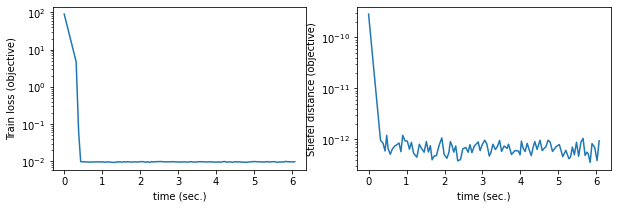

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
#fig.suptitle('PCA')

axs[0].semilogy(time_list, train_loss)
axs[0].set_xlabel('time (sec.)')
axs[0].set_ylabel('Train loss (objective)')

axs[1].semilogy(time_list, stiefel_distances)
axs[1].set_xlabel('time (sec.)')
axs[1].set_ylabel('Stiefel distance (objective)')

plt.show()


In [22]:
train_loss[-1]

0.009781250000003183

In [23]:
stiefel_distances[-1]

9.361637983915094e-13